In [94]:
# call libraries
# python libraries are a set of useful functions that eliminate the need for writing codes from scratch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#https://docs.google.com/spreadsheets/d/10poofg-l8DMdtUgGy8mOpra2IHmA9EQC7drmF9AyYHA/edit#gid=1485085913

# Read Data and Clean

In [95]:
# read data from google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/10poofg-l8DMdtUgGy8mOpra2IHmA9EQC7drmF9AyYHA/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=') 
df = pd.read_csv(sheet_url_trf)
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [97]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [98]:
df_cleaned = df.copy()
df_cleaned['Release'] = pd.to_datetime(df_cleaned['Release'])

print(df_cleaned.dtypes)
df_cleaned.head()

Name                 object
Sales               float64
Series               object
Release      datetime64[ns]
Genre                object
Developer            object
Publisher            object
dtype: object


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [99]:
# check typo
for col_name in ['Name','Series','Genre','Developer','Publisher'] :
  print(df_cleaned[col_name].value_counts(),'\n')

StarCraft II: Heart of the Swarm    2
StarCraft II: Legacy of the Void    2
PlayerUnknown's Battlegrounds       1
Duke Nukem 3D                       1
Crysis Warhead                      1
                                   ..
Battlefield 1942                    1
Black & White                       1
Civilization III                    1
Cossacks II: Napoleonic Wars        1
Zoo Tycoon                          1
Name: Name, Length: 175, dtype: int64 

StarCraft                6
Command & Conquer        5
Civilization             4
Age of Empires           4
Warcraft                 3
                        ..
Alice                    1
Ark: Survival Evolved    1
BioShock                 1
Commandos                1
Zoo Tycoon               1
Name: Series, Length: 91, dtype: int64 

Real-time strategy                        26
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game       

In [100]:
#we cant really see typo from those data, but we can see that 'length' Name column only 175 but in df.info() Name Column have 177 entries. We have to explore
#checking is there any duplicate name

a = df_cleaned['Name']

import collections
print([item for item, count in collections.Counter(a).items() if count>1])

['StarCraft II: Heart of the Swarm', 'StarCraft II: Legacy of the Void']


In [101]:
#determine which duplicate to mark with "keep" , first mean we want to keep first duplicate
df_cleaned.loc[df_cleaned.duplicated(keep='first'),:]

#dropping duplicate rows
df_cleaned.drop_duplicates()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
170,Vietcong,1.0,Vietcong,2003-03-01,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,2008-09-01,MMORPG,Mythic Entertainment,Electronic Arts
172,Who Wants to Be a Millionaire?,1.0,NaN,1999-11-01,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,1994-12-01,Space combat simulation,Origin Systems,Electronic Arts


In [102]:
#set the argument to remove duplicate from the original
df_cleaned.drop_duplicates(inplace=True)

#check df.info() to know that the row has been dropped
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


In [103]:
#checking missing value or null
# cara pertama
missing_values=df_cleaned.isnull().sum()
missing_values[missing_values>0]/len(df_cleaned)*100

Series    20.571429
dtype: float64

In [104]:
# it means series column has 20% null values
# cara kedua , perbedaan ada di akhiran, utk 1 mencari presentase = /len(df_cleaned)*100 ,utk yg 2 jumlah null = .sort_values(ascending=False)
null_counts = df_cleaned.isnull().sum()
null_counts[null_counts>0].sort_values(ascending=False)

Series    36
dtype: int64

In [105]:
# because series column has 20% missing values so we cant drop them. we have to change null to "unknown"
df_cleaned['Series'].fillna('Unknown',inplace=True)

missing_values=df_cleaned.isnull().sum()
missing_values[missing_values>0]/len(df_cleaned)*100
#if the series has no null anymore, we can move forward to EDA

Series([], dtype: float64)

In [106]:
# RE-CHECKING 1
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     175 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


In [107]:
# RE CHECKING 2
for col_name in ['Name','Series','Genre','Developer','Publisher'] :
  print(df_cleaned[col_name].value_counts(),'\n')

PlayerUnknown's Battlegrounds       1
Dungeon Siege                       1
Cuphead                             1
Danganronpa 2: Goodbye Despair      1
Danganronpa: Trigger Happy Havoc    1
                                   ..
Battlefield 1942                    1
Black & White                       1
Civilization III                    1
Cossacks II: Napoleonic Wars        1
Zoo Tycoon                          1
Name: Name, Length: 175, dtype: int64 

Unknown                  36
Command & Conquer         5
StarCraft                 4
Age of Empires            4
Civilization              4
                         ..
Pac-Man                   1
Alice                     1
Ark: Survival Evolved     1
BioShock                  1
Zoo Tycoon                1
Name: Series, Length: 92, dtype: int64 

Real-time strategy                        24
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing 

# EDA

In [108]:
df_cleaned.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Unknown,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Unknown,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Unknown,2011-05-01,Action-adventure,Re-Logic,Re-Logic


# Analyzing Part

In [109]:
#analyze number of genre
df_cleaned['Genre'].value_counts()

Real-time strategy                        24
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game                          8
                                          ..
Action role-playing game                   1
Maze, arcade                               1
Action-adventure, platformer               1
Action-adventure, Survival                 1
Space combat simulation                    1
Name: Genre, Length: 61, dtype: int64

In [110]:
#the highest number of game genre is real time strategy

#analyze number of game developers
df_cleaned['Developer'].value_counts()

Blizzard Entertainment             8
Maxis                              6
Paradox Development Studio         5
id Software                        4
Westwood Studios                   4
                                  ..
Kojima Productions                 1
Edmund McMillen & Florian Himsl    1
Landfall Games                     1
Keen Software House                1
Microsoft                          1
Name: Developer, Length: 109, dtype: int64

In [111]:
#the highest number of game developer is blizzard entertainment

#analyze number of game developers
df_cleaned['Publisher'].value_counts()

Electronic Arts           19
Blizzard Entertainment     8
Paradox Interactive        7
Activision                 6
GT Interactive             5
                          ..
Landfall Games             1
Headup Games               1
Atari, Inc                 1
Konami                     1
Blue Fang Games            1
Name: Publisher, Length: 96, dtype: int64

In [112]:
#the highest number of game publisher is EA

#analyze number of series
df_cleaned['Series'].value_counts()

Unknown                  36
Command & Conquer         5
StarCraft                 4
Age of Empires            4
Civilization              4
                         ..
Pac-Man                   1
Alice                     1
Ark: Survival Evolved     1
BioShock                  1
Zoo Tycoon                1
Name: Series, Length: 92, dtype: int64

In [113]:
#the second highest number of series is command & conquer

#analyze only the sales
print('Maximum of Sales :', df_cleaned['Sales'].max())
print('Minimum of Sales :', df_cleaned['Sales'].min())
print('Median of Sales :', df_cleaned['Sales'].median())
print('Average of Sales :', df_cleaned['Sales'].mean())
print('Total of Sales :', df_cleaned['Sales'].sum())


Maximum of Sales : 42.0
Minimum of Sales : 1.0
Median of Sales : 1.5
Average of Sales : 3.1411428571428575
Total of Sales : 549.7


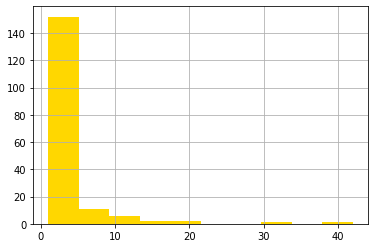

In [114]:
#distribution of sales
df_cleaned['Sales'].hist(color = 'gold')

In [115]:
#the highest distribution of sales between 0 - 10 millions

#analyze genre based on average sales
pd.pivot_table(df_cleaned, index = 'Genre', values = 'Sales', aggfunc = {'Sales': np.mean}).sort_values('Sales', ascending =False)

,Sales
Genre,
"Sandbox, survival",33.000000
Battle royale,26.000000
Sandbox,20.000000
Life simulation,8.000000
Action-adventure,5.283333
...,...
Platform,1.000000
Point-and-click,1.000000
Puzzle,1.000000


In [116]:
#the highest average sales based on genre is Sandbox, survival

#analyze game publisher based on average sales
pd.pivot_table(df_cleaned, index = 'Publisher', values = 'Sales', aggfunc = {'Sales':np.mean}).sort_values('Sales',ascending = False)

,Sales
Publisher,
Krafton,42.0
Mojang Studios,33.0
Valve,20.0
Re-Logic,17.2
"Atari, Inc. (Windows)",10.0
...,...
LucasArts,1.0
MicroProse,1.0
Microsoft Game Studios,1.0


In [117]:
#the highest average sales based on game publisher is Krafton

#analyze developer based on average sales
pd.pivot_table(df_cleaned,index='Developer',values='Sales',aggfunc={'Sales':np.mean}).sort_values('Sales',ascending=False)

,Sales
Developer,
PUBG Studios,42.0
Mojang Studios,33.0
Re-Logic,17.2
Facepunch Studios,14.5
Mediatonic,10.0
...,...
"Péndulo Studios, S.L.",1.0
Enlight Software,1.0
EA Los Angeles,1.0


In [118]:
#the highest avaerage sale based on developer is PUBG Studios

#analyze series based on average sales
pd.pivot_table(df_cleaned,index='Series',values='Sales',aggfunc={'Sales':np.mean}).sort_values('Sales',ascending=False)

,Sales
Series,
Minecraft,33.000000
Half-Life,10.500000
Diablo,8.666667
The Sims,8.000000
RollerCoaster Tycoon,7.000000
...,...
Psychonauts,1.000000
Quake,1.000000
Railroad Tycoon,1.000000


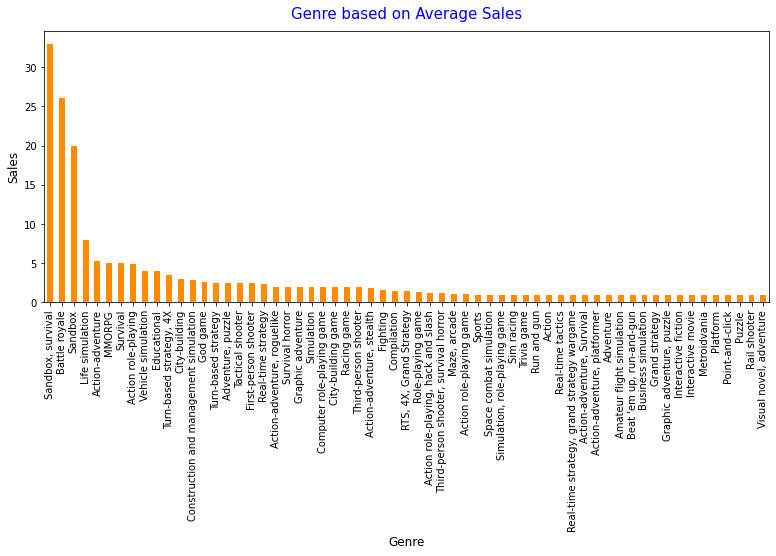

In [119]:
#the highest average sales based on series is Minecraft

#visualize genre based on avg sales
plt.figure(figsize = (13,5))
df_cleaned.groupby('Genre')['Sales'].mean().sort_values(ascending=False).plot(kind='bar',color='darkorange')
plt.title('Genre based on Average Sales', fontsize=15, color='b', pad=12)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.show()

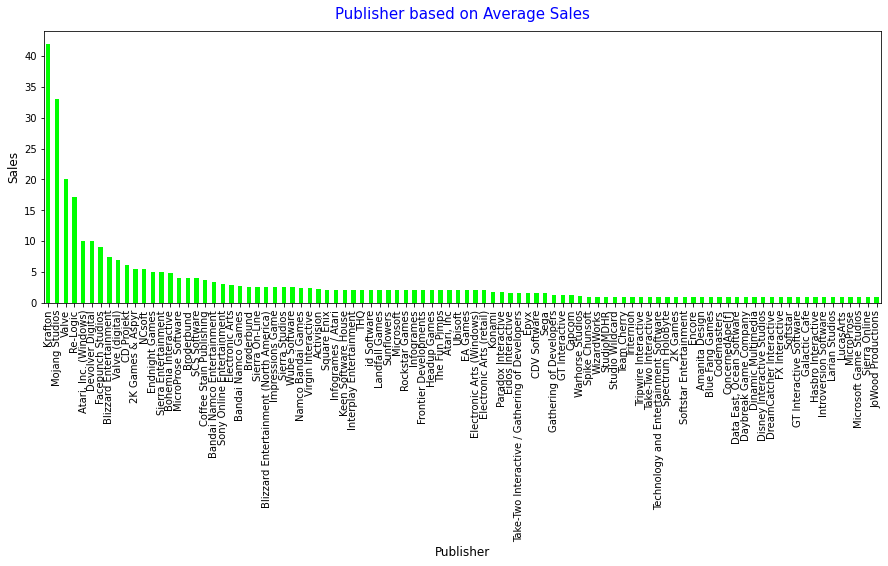

In [120]:
#visualize publisher based on avg sales
plt.figure(figsize = (15,5))
df_cleaned.groupby('Publisher')['Sales'].mean().sort_values(ascending=False).plot(kind='bar',color='lime')
plt.title('Publisher based on Average Sales', fontsize=15, color='b', pad=12)
plt.xlabel('Publisher',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.show()

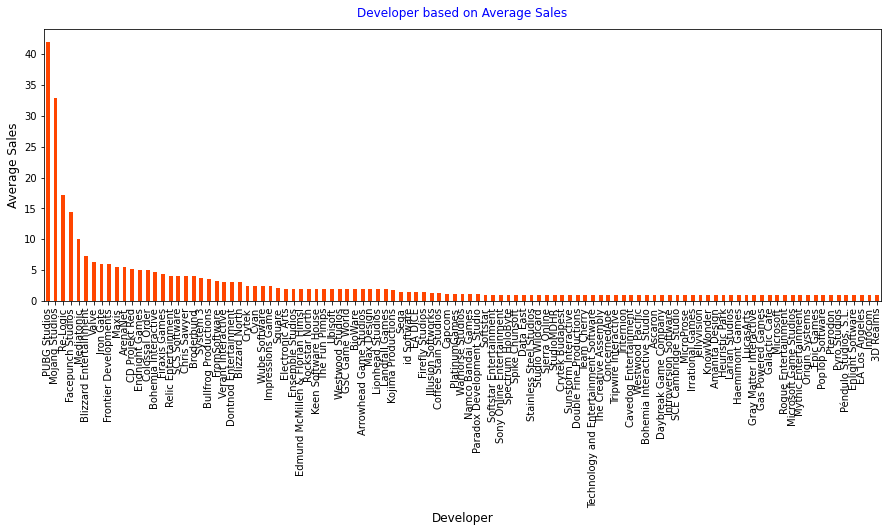

In [121]:
#visualize developer based on avg sales
plt.figure(figsize=(15,5))
df_cleaned.groupby('Developer')['Sales'].mean().sort_values(ascending=False).plot(kind='bar', color='orangered')
plt.title('Developer based on Average Sales', fontsize=12, color='b', pad=12)
plt.xlabel('Developer',fontsize=12)
plt.ylabel('Average Sales',fontsize=12)
plt.show()

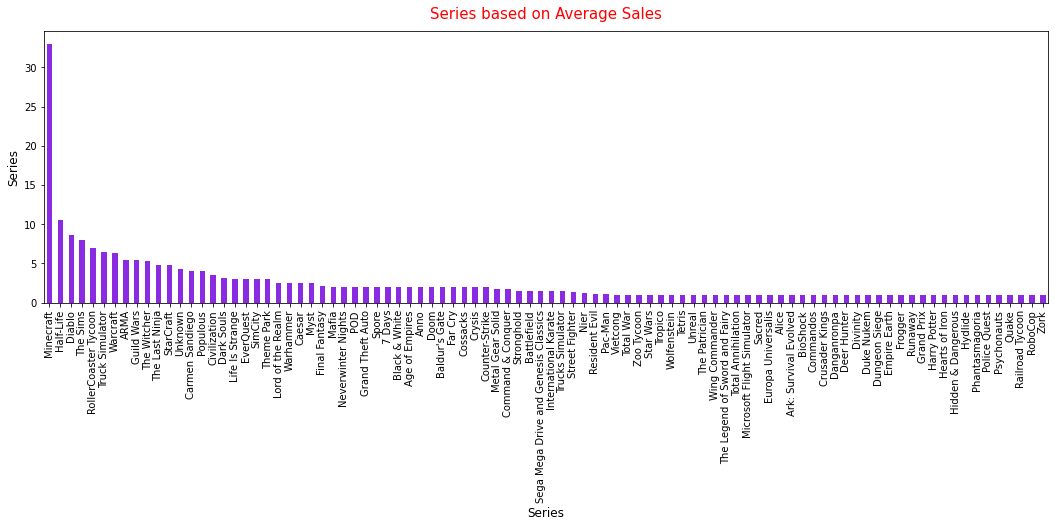

In [122]:
plt.figure(figsize=(18,5))
df_cleaned.groupby('Series')['Sales'].mean().sort_values(ascending=False).plot(kind='bar',color='blueviolet')
plt.title('Series based on Average Sales',fontsize=15,color='r', pad=12)
plt.xlabel('Series',fontsize=12)
plt.ylabel('Series',fontsize=12)
plt.show()

In [126]:
#analyze sales based on release
#add year column
df_cleaned['Year'] = df_cleaned['Release'].dt.year
df_cleaned.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher,Year
0,PlayerUnknown's Battlegrounds,42.0,Unknown,2017-12-01,Battle royale,PUBG Studios,Krafton,2017
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios,2011
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,2012
3,Garry's Mod,20.0,Unknown,2006-11-01,Sandbox,Facepunch Studios,Valve,2006
4,Terraria,17.2,Unknown,2011-05-01,Action-adventure,Re-Logic,Re-Logic,2011


In [190]:
#analyze sales based on year release (cara 1)
avg_sales = pd.pivot_table(df_cleaned, index= 'Year', values='Sales', aggfunc={'Sales':np.mean}).sort_values('Sales',ascending=False)
avg_sales.head()

,Sales
Year,
2011,9.533333
2017,8.033333
2006,7.333333
2021,6.000000
2012,5.514286


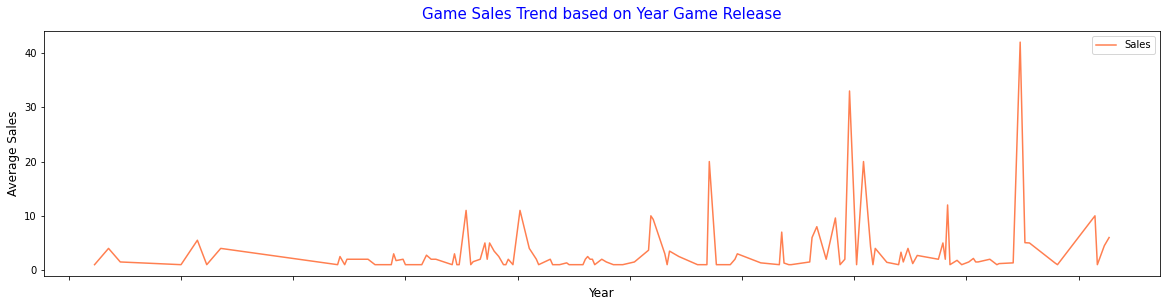

In [198]:
#visualize trend avg game sales based on year release
chart = Sales.sort_values(by='Sales',ascending = False).plot(kind = 'line', color = 'coral')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.title('Game Sales Trend based on Year Game Release',fontsize=15,color='b',loc='center',pad=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()

In [186]:
#analyze sales based on year release
agg_year = df_cleaned.groupby('Year', as_index=False)['Sales'].sum()
agg_year.head()

,Year,Sales
0,1984,1.0
1,1985,5.5
2,1988,7.5
3,1989,4.0
4,1993,6.5


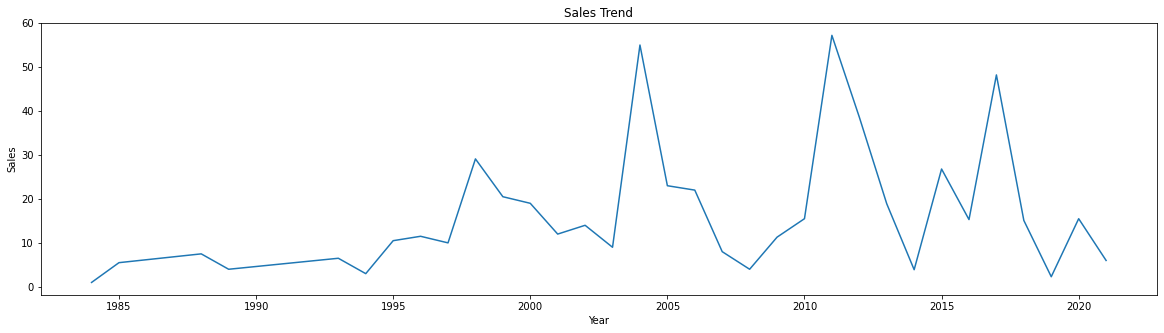

In [187]:
plt.rcParams["figure.figsize"] = (20,5)

plt.plot('Year','Sales', data=agg_year)

plt.title('Total Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [188]:
#analyze avg sales based on year release (cara 2)
avg_year = df_cleaned.groupby('Year', as_index=False)['Sales'].mean()
avg_year.head()

,Year,Sales
0,1984,1.000
1,1985,2.750
2,1988,2.500
3,1989,4.000
4,1993,1.625


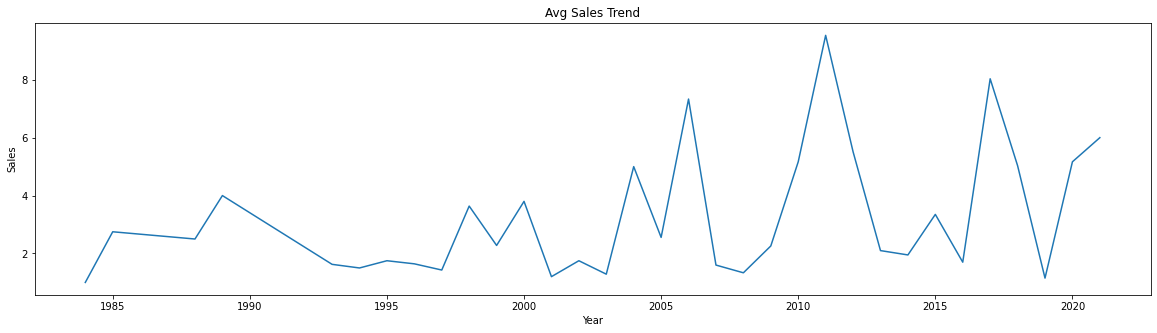

In [189]:
plt.rcParams["figure.figsize"] = (20,5)

plt.plot('Year','Sales', data=avg_year)

plt.title('Avg Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [200]:
#sns.lineplot(data=agg_year, x='Year', y='Sales')

#Just For Fun, trying Bar Chart & Pie Chart

In [201]:
agg_publisher = df_cleaned.groupby('Publisher',as_index=False).agg({'Sales':'sum'})
agg_publisher

,Publisher,Sales
0,2K Games,1.0
1,2K Games & Aspyr,11.0
2,Activision,13.5
3,Amanita Design,1.0
4,"Atari, Inc",2.0
...,...,...
91,Virgin Interactive,7.0
92,Warhorse Studios,1.1
93,WizardWorks,1.0
94,Wube Software,2.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


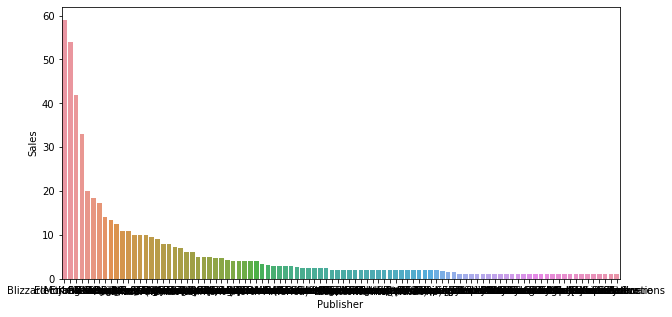

In [202]:
plt.rcParams["figure.figsize"]=(10,5)
sns.barplot('Publisher','Sales',data = agg_publisher.sort_values('Sales',ascending=False))

In [203]:
agg_developer = df_cleaned.groupby('Developer',as_index=False).agg({'Sales':'sum'})
agg_developer

,Developer,Sales
0,3D Realms,1.0
1,Amanita Design,1.0
2,ArenaNet,11.0
3,Arrowhead Game Studios,2.0
4,Ascaron,2.0
...,...,...
104,Warhorse Studios,1.1
105,Westwood Pacific,1.0
106,Westwood Studios,8.0
107,Wube Software,2.5


([<matplotlib.patches.Wedge at 0x7f25b6fc8f50>,
 [Text(1.0999820357180403, 0.006286580755555991, '1.0'),
  Text(1.0998383249828747, 0.018858920935852813, '1.0'),
  Text(1.0959605004762913, 0.09418376397106464, '11.0'),
  Text(1.0859459940327922, 0.1752749213211375, '2.0'),
  Text(1.081655740402275, 0.20005214134021712, '2.0'),
  Text(1.0713820286579059, 0.24928006071258504, '6.0'),
  Text(0.9113510713763566, 0.6159863835355187, '58.0'),
  Text(0.6307480401037975, 0.9011974866283297, '6.0'),
  Text(0.5485474510634162, 0.9534650984340377, '9.5'),
  Text(0.49037830682997163, 0.9846466961253516, '1.0'),
  Text(0.4620451438075139, 0.9982556211130964, '4.0'),
  Text(0.3984172511103811, 1.025311510721326, '7.0'),
  Text(0.23302584222003037, 1.0750343979881043, '20.5'),
  Text(0.07569369734788925, 1.0973925752354106, '4.8'),
  Text(0.03928283984202471, 1.0992983482630847, '1.0'),
  Text(0.007858052631318089, 1.0999719319186485, '4.0'),
  Text(-0.025458666359214135, 1.0997053497674776, '1.3'),


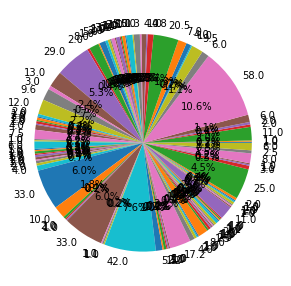

In [204]:
plt.pie(agg_developer['Sales'],labels = agg_developer['Sales'],autopct='%.1f%%')